In [1]:
import cv2
print(cv2.__version__)

import numpy as np
from matplotlib import pyplot as plt
import time

# Only for jupyter notebook visualization
%matplotlib inline 

4.4.0


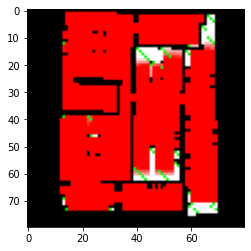

108
[2, 66, 3, 67, 4, 68, 6, 64, 7, 65, 10, 66, 11, 67, 12, 13, 12, 68, 13, 59, 14, 40, 14, 49, 15, 41, 15, 50, 15, 58, 16, 42, 16, 51, 16, 59, 17, 43, 17, 52, 18, 44, 19, 46, 20, 45, 21, 49, 39, 13, 39, 22, 40, 23, 46, 23, 51, 45, 52, 46, 52, 54, 53, 55, 56, 54, 57, 55, 58, 39, 59, 40, 59, 48, 60, 41, 60, 49, 61, 42, 61, 50, 62, 43, 62, 51, 67, 59, 69, 13, 71, 60, 71, 68, 72, 59, 72, 67, 73, 14, 73, 30, 73, 61, 73, 69, 74, 62]


In [2]:

def check_new_goals(image_rgb):
    new_goals = []
    check_neigh = np.zeros([image_rgb.shape[0],image_rgb.shape[1]])

    for i in range(0, image_rgb.shape[0]):
        for j in range(0, image_rgb.shape[1]):
            check_tuple = (image_rgb[i,j,0], image_rgb[i,j,1], image_rgb[i,j,2])
            if ((check_tuple != (0,0,0) and check_tuple != (255,0,0)) and check_neigh[i,j] != 1):  ## pixel to be energized
                new_goals.append(i)  #Append x to be transformed
                new_goals.append(j)  #Append y to be transformed
                check_neigh[i,j] = 1  #it is considered to be energized

                #find neighbourhood
                for k in range(j-1, j-8,-1): # trhee pixels left
                    check_tuple = (image_rgb[i,k,0], image_rgb[i,k,1], image_rgb[i,k,2])
                    if check_tuple != (0,0,0) and check_tuple != (255,0,0):  ## pixel to be energized
                        check_neigh[i,k] = 1
                    else:
                        break
                
                for k in range(j+1, j+8): # trhee pixels right
                    check_tuple = (image_rgb[i,k,0], image_rgb[i,k,1], image_rgb[i,k,2])
                    if check_tuple != (0,0,0) and check_tuple != (255,0,0):  ## pixel to be energized
                        check_neigh[i,k] = 1
                    else:
                        break
                
                for k in range(i-1, i-8,-1): # trhee pixels up
                    check_tuple = (image_rgb[k,j,0], image_rgb[k,j,1], image_rgb[k,j,2])
                    if check_tuple != (0,0,0) and check_tuple != (255,0,0):  ## pixel to be energized
                        check_neigh[k,j] = 1
                    else:
                        break
                
                for k in range(i+1, i+8): # trhee pixels down
                    check_tuple = (image_rgb[k,j,0], image_rgb[k,j,1], image_rgb[k,j,2])
                    if check_tuple != (0,0,0) and check_tuple != (255,0,0):  ## pixel to be energized
                        check_neigh[k,j] = 1
                    else:
                        break

    return new_goals


image_rgb = cv2.imread('/home/lorenzo/map_from_code.png')
image_rgb = cv2.cvtColor(image_rgb,cv2.COLOR_BGR2RGB)
news_ = check_new_goals(image_rgb)
#print(news_)
for i in range(0, len(news_),2):
    image_rgb[news_[i],news_[i+1]] = [0,255,0]

plt.imshow(image_rgb)
plt.show()

#image_rgb = cv2.cvtColor(image_rgb,cv2.COLOR_BGR2RGB) # just for saving the image with the right colors

#cv2.imwrite("/home/lorenzo/map_from_code_px_to_en.png", image_rgb)

px_to_en = news_
print(len(px_to_en))
print(px_to_en)


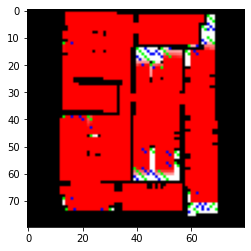

54.0


True

In [3]:
'''
NOTE: the notation used here is different from the code used, here we kept the name new_goals,
in the code we changed the names.
'''

dist_ = 4

# find new goals based on pixel found in previous loops

new_goals = []
for i in range(0, len(px_to_en),2):
    x_px_en = px_to_en[i]
    y_px_en = px_to_en[i+1]
    check_goal = False # bool used to indicate that a goal has already been identified among neighbour pixels

    limit_up = x_px_en - dist_
    if limit_up < 0:
        limit_up = 0

    limit_left = y_px_en - dist_
    if limit_left < 0:
        limit_left = 0

    limit_right = y_px_en + dist_
    if limit_right >= image_rgb.shape[1]-1:
        limit_right = image_rgb.shape[1]

    limit_down = x_px_en + dist_
    if limit_down >= image_rgb.shape[0]-1:
        limit_down = image_rgb.shape[0] 

    
    for k in range(y_px_en-1,limit_left,-1): # scan 3 pixel to the left
        check_tuple = (image_rgb[x_px_en,k,0], image_rgb[x_px_en,k,1], image_rgb[x_px_en,k,2])
        if check_tuple == (0,0,0):
            break
        elif check_tuple != (0,0,0) and k == y_px_en-3:
            new_goals.append(x_px_en)
            new_goals.append(k)
            check_goal = True

    for k in range(y_px_en+1,limit_right): # scan 3 pixel to the right
        check_tuple = (image_rgb[x_px_en,k,0], image_rgb[x_px_en,k,1], image_rgb[x_px_en,k,2])
        if check_tuple == (0,0,0) or check_goal is True:
            break
        elif check_tuple != (0,0,0) and k == y_px_en+3:
            new_goals.append(x_px_en)
            new_goals.append(k)
            check_goal = True

    for k in range(x_px_en-1,limit_up,-1): # scan 3 pixel up
        check_tuple = (image_rgb[k,y_px_en,0], image_rgb[k,y_px_en,1], image_rgb[k,y_px_en,2])
        if check_tuple == (0,0,0) or check_goal is True:
            break
        elif check_tuple != (0,0,0) and k == x_px_en-3:
            new_goals.append(k)
            new_goals.append(y_px_en)
            check_goal = True

    for k in range(x_px_en+1,limit_down): # scan 3 pixel down
        check_tuple = (image_rgb[k,y_px_en,0], image_rgb[k,y_px_en,1], image_rgb[k,y_px_en,2])
        if check_tuple == (0,0,0) or check_goal is True:
            break
        elif check_tuple != (0,0,0) and k == x_px_en+3:
            new_goals.append(k)
            new_goals.append(y_px_en)
            check_goal = True

    if check_goal is False:
        print("check_goal is False!")
    check_goal = False # put False for the next iteration 

    
#print(px_to_en)
for i in range(0, len(new_goals),2):
    image_rgb[new_goals[i],new_goals[i+1]] = [0,0,250]

plt.imshow(image_rgb)
plt.show()

print(len(new_goals)/2)
#image_rgb = cv2.cvtColor(image_rgb,cv2.COLOR_BGR2RGB) # just for saving the image with the right colors
#cv2.imwrite("/home/lorenzo/map_from_code_new_goals.png", image_rgb)

In [14]:
resolution = 0.2
w = 80
h = 80
x_px_goal=1
y_px_goal=17

# transformation from pixel coordinates in map coordinates [m]
x_pos_goal = -resolution*(x_px_goal-h/2+3) #+3*resolution
y_pos_goal = -resolution*(y_px_goal-w/2+2) #+2*resolution
print(x_pos_goal)
print(y_pos_goal)

7.2
4.2
